<a href="https://colab.research.google.com/github/KollexTheAnalyst/Carbon_Capture_Storage/blob/main/Carbon_Capture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Given data
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
stored_co2 = [3090607.7, 5958384.9, 7661556.1, 8332419.7, 6802415.6, 6951291.9, 7945796.2]
leakage_rate = 9.9 * 10**-6  # Leakage rate per year

In [ ]:
# Target mass to affect pH change
target_mass = 480000  # 480,000 metric tonnes of CO2

In [ ]:
# Initialize DataFrame to hold the results
df = pd.DataFrame({
    'Year': years,
    'Stored_CO2': stored_co2,
    'Annual_Leakage': [0] * len(years),
    'Cumulative_Leakage': [0] * len(years),
})

In [ ]:
# Calculate cumulative leakage for existing years
cumulative_leakage = 0
previous_cummulative_co2 = stored_co2[0]  # Initial stored CO2

In [ ]:
# Calculate annual leakage and cumulative leakage
for i in range(len(years)):
    # Calculate the annual leakage
    annual_leakage = previous_cummulative_co2 * leakage_rate

    # Store annual leakage in the DataFrame
    df.loc[i, 'Annual_Leakage'] = annual_leakage

    # Update cumulative leakage
    cumulative_leakage += annual_leakage
    df.loc[i, 'Cumulative_Leakage'] = cumulative_leakage

    # Subtract the annual leakage from the total CO2 stored
    # This gives the cumulative CO2 left after leakage
    if i + 1 < len(years):
        total_co2_next_year = previous_cummulative_co2 - annual_leakage + stored_co2[i + 1]
        df.loc[i + 1, 'Stored_CO2'] = total_co2_next_year
        previous_cummulative_co2 = total_co2_next_year

In [ ]:
# Display the DataFrame to verify the calculations
print(df)

   Year    Stored_CO2  Annual_Leakage  Cumulative_Leakage
0  2016  3.090608e+06       30.597016           30.597016
1  2017  9.048962e+06       89.584724          120.181740
2  2018  1.671043e+07      165.433242          285.614982
3  2019  2.504268e+07      247.922560          533.537542
4  2020  3.184485e+07      315.264020          848.801562
5  2021  3.879583e+07      384.078688         1232.880250
6  2022  4.674124e+07      462.738268         1695.618518


In [ ]:
# Extend to 1,000 years from 2023 onwards
#future_years = range(2022, 2022 + 1500)
##future_stored_co2 = previous_cummulative_co2
# Define stored CO2 for 2022
stored_co2_2022 = df['Stored_CO2'].iloc[-1]

# Define annual leakage for 2022
annual_leakage_2022 = df['Annual_Leakage'].iloc[-1]

future_stored_co2 = stored_co2_2022 - annual_leakage_2022

# Generate future years from 2023 to 2522 (for example, 1500 years)
future_years = range(2023, 2023 + 1500)

In [ ]:
# Initialize lists for additional data
additional_rows = []
for i, year in enumerate(future_years):
    # Calculate annual leakage for this year
    annual_leakage = future_stored_co2 * leakage_rate
    cumulative_leakage += annual_leakage

    # Store the calculated data for this year
    additional_rows.append({
        'Year': year,
        'Stored_CO2': future_stored_co2,
        'Annual_Leakage': annual_leakage,
        'Cumulative_Leakage': cumulative_leakage
    })

    # Update remaining stored CO2 for the next iteration
    future_stored_co2 -= annual_leakage

In [ ]:
# Combine DataFrames using concat instead of append
additional_df = pd.DataFrame(additional_rows)

# Concatenate the new DataFrame with the existing one
df = pd.concat([df, additional_df], ignore_index=True)

In [ ]:
# Display the DataFrame
print(df.head(10))  # Display first 10 rows
print(df.tail(10))  # Display last 10 rows

   Year    Stored_CO2  Annual_Leakage  Cumulative_Leakage
0  2016  3.090608e+06       30.597016           30.597016
1  2017  9.048962e+06       89.584724          120.181740
2  2018  1.671043e+07      165.433242          285.614982
3  2019  2.504268e+07      247.922560          533.537542
4  2020  3.184485e+07      315.264020          848.801562
5  2021  3.879583e+07      384.078688         1232.880250
6  2022  4.674124e+07      462.738268         1695.618518
7  2023  4.674078e+07      462.733687         2158.352205
8  2024  4.674031e+07      462.729106         2621.081311
9  2025  4.673985e+07      462.724525         3083.805836
      Year    Stored_CO2  Annual_Leakage  Cumulative_Leakage
1497  3513  4.605636e+07      455.957966       686567.835800
1498  3514  4.605590e+07      455.953452       687023.789252
1499  3515  4.605545e+07      455.948938       687479.738190
1500  3516  4.605499e+07      455.944424       687935.682615
1501  3517  4.605454e+07      455.939911       688391.622

In [ ]:
from google.colab import files

kola = pd.DataFrame(df)
csv_filename = 'CO2_main2_datasets_alt.csv'
kola.to_csv(csv_filename, index=False)
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Find the forecast year
forecast_row = df[df['Cumulative_Leakage'] >= 480000]  # Find rows meeting condition

In [ ]:
# Check if the condition is met
if not forecast_row.empty:  # Avoid out-of-bounds error
    forecast_year = forecast_row['Year'].iloc[0]  # Get the first year meeting the condition
else:
    forecast_year = None  # No forecast year found

<ipython-input-14-b7cc7794cac3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=df[df['Year'] >= 2023][df['Year'] <= 3200], x='Year', y='Cumulative_Leakage', linestyle='--', color='gray', label='Forecast (2023–3200)')


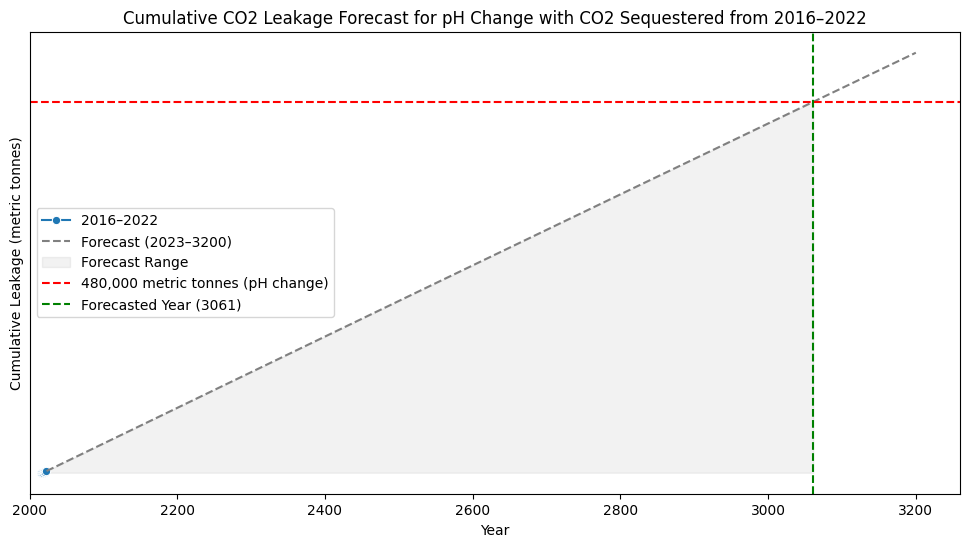

In [ ]:
# Create the plot
plt.figure(figsize=(12, 6))

# Plot for 2016–2022
sns.lineplot(data=df[df['Year'].isin(years)], x='Year', y='Cumulative_Leakage', marker='o', linestyle='-', label='2016–2022')

# Plot for 2023–2065 with a dashed line to indicate a forecast
sns.lineplot(data=df[df['Year'] >= 2023][df['Year'] <= 3200], x='Year', y='Cumulative_Leakage', linestyle='--', color='gray', label='Forecast (2023–3200)')

# Apply a shaded area to the forecast period, from 2023 to forecast_year
if forecast_year:
    plt.fill_between(df['Year'], df['Cumulative_Leakage'],
                     where=(df['Year'] >= 2023) & (df['Year'] <= forecast_year),
                     color='gray', alpha=0.1, label='Forecast Range')

# Horizontal and vertical lines for reference
if forecast_year:
    plt.axhline(y=480000, color='r', linestyle='--', label='480,000 metric tonnes (pH change)')
    plt.axvline(x=forecast_year, color='g', linestyle='--', label=f'Forecasted Year ({forecast_year})')

# Set x-axis limits to start from 2000
plt.xlim(2000, None)  # Start from 2000, open-ended upper limit

# Remove y-axis tick labels
plt.yticks([])  # No tick labels on y-axis

plt.xlabel('Year')
plt.ylabel('Cumulative Leakage (metric tonnes)')
plt.title('Cumulative CO2 Leakage Forecast for pH Change with CO2 Sequestered from 2016–2022')
plt.legend()
plt.show()